In [1]:
import numpy as np
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
from sklearn import datasets 

In [6]:
def PCM(data, t_old, c, q):

    t_old /= np.ones((c, 1)).dot(np.atleast_2d(t_old.sum(axis=0)))
    t_old = np.fmax(t_old, np.finfo(np.float64).eps)

    tq = t_old ** q
    
    data = data.T
    cntr = tq.dot(data) / (np.ones((data.shape[1],
                                    1)).dot(np.atleast_2d(tq.sum(axis=1))).T)

    d = _distance(data, cntr)
    d = np.fmax(d, np.finfo(np.float64).eps)
    
    nta = np.sum(tq * d ** 2, axis=1) / np.sum(tq, axis=1) #Eta
    
    jm = (tq * d ** 2).sum() + nta.sum() * ((1 - t_old) ** q).sum() #Objective func.

    t = (1 + (((d **2).T / nta).T **(1 / (q - 1)))) **-1

    t /= np.ones((c, 1)).dot(np.atleast_2d(t.sum(axis=0)))

    return cntr, t, jm, d

def _distance(data, centers):
    return cdist(data, centers).T

def cmeans(data, c, q, error=1e-3, maxiter=300, init=None, seed=None):
    if init is None:
        if seed is not None:
            np.random.seed(seed=seed)
        n = data.shape[1]
        t0 = np.random.rand(c, n)
        t0 /= np.ones(
            (c, 1)).dot(np.atleast_2d(t0.sum(axis=0))).astype(np.float64)
        init = t0.copy()
    t0 = init
    t = np.fmax(t0, np.finfo(np.float64).eps)

    jm = np.zeros(0)
    p = 0

    while p < maxiter - 1:
        t2 = t.copy()
        [cntr, t, Jjm, d] = PCM(data, t2, c, q)
        jm = np.hstack((jm, Jjm))
        p += 1

        if np.linalg.norm(t - t2) < error:
            break

    error = np.linalg.norm(t - t2)

    return cntr, t

In [27]:
n_samples = 1500
n_clusters = 3
q = 2

In [28]:
iris_dataset = datasets.load_iris()

X = iris_dataset.data
Y = iris_dataset.target

In [29]:
centers, L = cmeans(X.T, n_clusters, q)

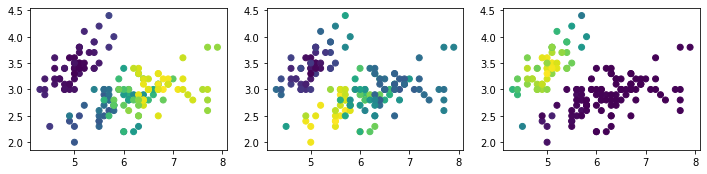

In [30]:
plt.figure(figsize=(12, 12))
plt.subplot(431)
plt.scatter(X[:, 0], X[:, 1], c=L[0,:])
plt.subplot(432)
plt.scatter(X[:, 0], X[:, 1], c=L[1,:])
plt.subplot(433)
plt.scatter(X[:, 0], X[:, 1], c=L[2,:])